<a href="https://colab.research.google.com/github/Swetha0713/AIML/blob/main/LAB_EXAM_AIML_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

df = pd.read_csv('/content/weather_forecast_data.csv')

X = df.drop(columns='Rain')
y = df['Rain']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)




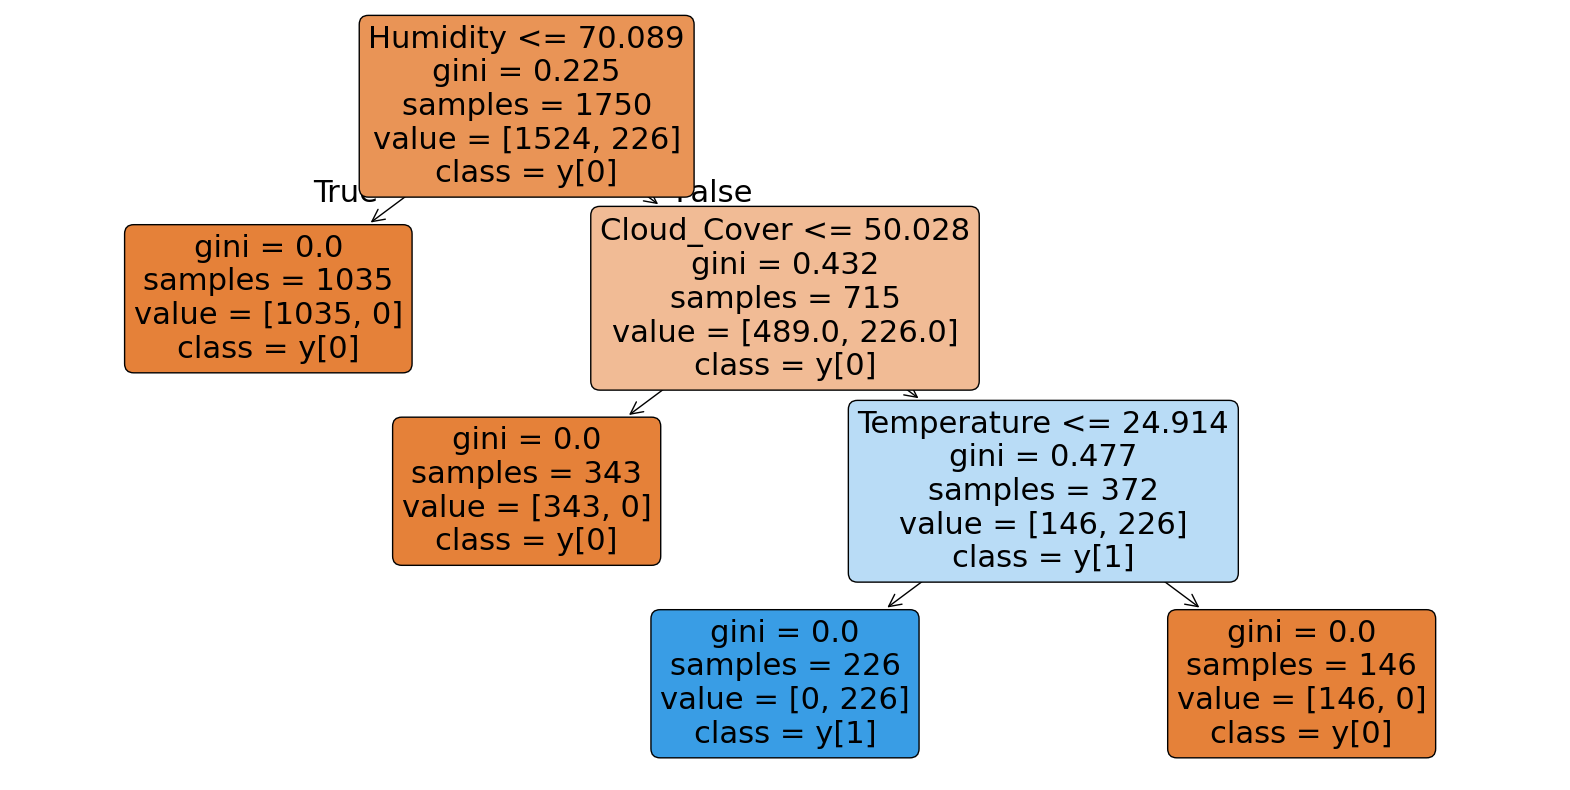

In [3]:

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=True, rounded=True)
plt.show()


In [4]:

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 1.00
Confusion Matrix:
[[662   0]
 [  0  88]]


Pruned Accuracy: 1.00


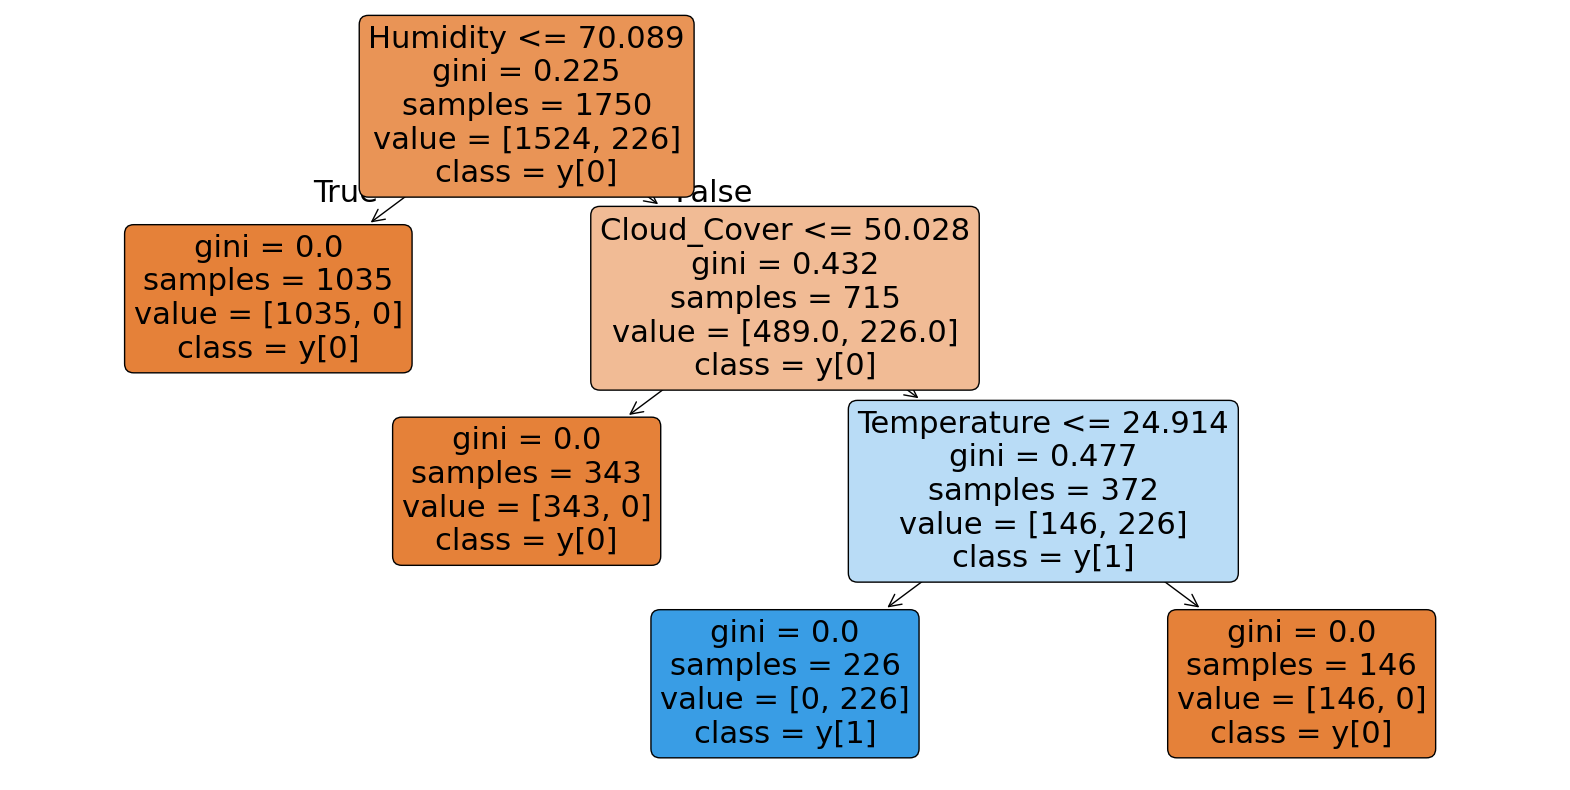

In [7]:

pruned_clf = DecisionTreeClassifier(max_depth=6, random_state=48)  # You can adjust max_depth or min_samples_split
pruned_clf.fit(X_train, y_train)

y_pruned_pred = pruned_clf.predict(X_test)
pruned_accuracy = accuracy_score(y_test, y_pruned_pred)
print(f'Pruned Accuracy: {pruned_accuracy:.2f}')
plt.figure(figsize=(20,10))
plot_tree(pruned_clf, filled=True, feature_names=X.columns, class_names=True, rounded=True)
plt.show()


In [8]:

importances = clf.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print('Feature Importances:')
print(feature_importance)


Feature Importances:
       Feature  Importance
0  Temperature    0.450675
3  Cloud_Cover    0.334662
1     Humidity    0.214663
2   Wind_Speed    0.000000
4     Pressure    0.000000


In [9]:
print(f'Original Model Accuracy: {accuracy:.2f}')
print(f'Pruned Model Accuracy: {pruned_accuracy:.2f}')
print('Confusion Matrix for Original Model:')
print(conf_matrix)
print('Confusion Matrix for Pruned Model:')
print(confusion_matrix(y_test, y_pruned_pred))


Original Model Accuracy: 1.00
Pruned Model Accuracy: 1.00
Confusion Matrix for Original Model:
[[662   0]
 [  0  88]]
Confusion Matrix for Pruned Model:
[[662   0]
 [  0  88]]
